<a href="https://colab.research.google.com/github/Taimaaaa/Classification-Metrics/blob/main/Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification Metrics Core
* Author: Taima Nasser

##Utility Functions

In [61]:
# Custom EDA Toolkit
# Works for both categorical and numeric features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Explore Categorical
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

    # Make a copy of the dataframe and fillna
    temp_df = df.copy()
    # Before filling nulls, save null value counts and percent for printing
    null_count = temp_df[x].isna().sum()
    null_perc = null_count / len(temp_df) * 100
    # fillna with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)
    # Create figure with desired figsize
    fig, ax = plt.subplots(figsize=figsize)
    # Plotting a count plot
    sns.countplot(data=temp_df, x=x, ax=ax, order=order)
    # Rotate Tick labels for long names
    ax.tick_params(axis='x', labelrotation=45)
    plt.setp(ax.get_xticklabels(), ha='right')
    # Add a title with the feature name included
    ax.set_title(f"Column: {x}")

    # Fix layout and show plot (before print statements)
    fig.tight_layout()
    plt.show()

    # Print null value info
    print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
    # Print cardinality info
    nunique = temp_df[x].nunique()
    print(f"- Unique Values: {nunique}")
    # First find value counts of feature
    val_counts = temp_df[x].value_counts(dropna=False)
    # Define the most common value
    most_common_val = val_counts.index[0]
    # Define the frequency of the most common value
    freq = val_counts.values[0]
    # Calculate the percentage of the most common value
    perc_most_common = freq / len(temp_df) * 100
    # Print the results
    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
    # print message if quasi-constant or constant (most common val more than 98% of data)
    if perc_most_common > 98:
        print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print("- Not constant or quasi-constant.")
    return fig, ax



# Plot Categorical vs Target
# Updating function
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                               fillna=True, placeholder='MISSING',
                               order=None, target_type='reg'):
    # Make a copy of the dataframe and fillna
    temp_df = df.copy()

    # fillna with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)
    # or drop nulls to prevent unwanted 'nan' group in stripplot
    else:
        temp_df = temp_df.dropna(subset=[x])

    # Create the figure and subplots
    fig, ax = plt.subplots(figsize=figsize)

    # REGRESSION - TARGET PLOT
    if target_type == 'reg':  # Added if statement here
        # Barplot
        sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order,
                    alpha=0.6, linewidth=1, edgecolor='black',
                    errorbar=None)
        # Stripplot
        sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                      order=order, hue_order=order, legend=False,
                      edgecolor='white', linewidth=0.5,
                      size=3, zorder=6)

    # CLASSIFICATION - TARGET PLOT
    elif target_type == 'class':
        ax = sns.histplot(data=temp_df, hue=y, x=x,
                          stat='percent', multiple='fill')

    # Rotate xlabels
    ax.set_xticks(ax.get_xticks())  # Prevent a bug
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add a title
    ax.set_title(f"{x} vs. {y}")
    fig.tight_layout()

    return fig, ax



# Explore Numeric
def explore_numeric(df, x, figsize=(6,5)):
    gridspec = {'height_ratios': [0.7, 0.3]}
    fig, axes = plt.subplots(nrows=2, figsize=figsize,
                             sharex=True, gridspec_kw=gridspec)

    sns.histplot(data=df, x=x, ax=axes[0])
    sns.boxplot(data=df, x=x, ax=axes[1])
    axes[0].set_title(f"Column: {x}", fontweight='bold')
    fig.tight_layout()
    plt.show()

    null_count = df[x].isna().sum()
    null_perc = null_count / len(df) * 100
    print(f"— NaN's Found: {null_count} ({round(null_perc, 2)}%)")

    unique_vals = df[x].nunique()
    print(f"— Unique Values: {unique_vals}")

    # Get the most common value(s)
    most_common_val_count = df[x].value_counts(dropna=False).head(1)
    most_common_val = most_common_val_count.index[0]
    freq = most_common_val_count.values[0]
    perc_most_common = freq / len(df) * 100

    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
    if perc_most_common > 98:
      print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    else:
      print("- Not constant or quasi-constant.")
      return fig, axes




# Plot Numeric vs Target
# Updating the function
# Updating the function
def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci', sorted=False, ascending=False,
                           **kwargs):  # kwargs for sns.regplot

    # Handle null values
    nulls = df[[x,y]].isna().sum()
    if nulls.sum() > 0:
        print(f"- Excluding {nulls.sum()} NaN's")
        temp_df = df.dropna(subset=[x,y])
    else:
        temp_df = df

    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)

    # REGRESSION – TARGET PLOT
    if target_type == 'reg':
        # Calculate correlation
        corr = df[[x,y]].corr().round(2)
        r = corr.loc[x,y]

        # Plot regression with scatter
        scatter_kws = {'ec':'white','lw':1,'alpha':0.6}
        sns.regplot(data=temp_df, x=x, y=y, ax=ax,
                    scatter_kws=scatter_kws, **kwargs)

        # Add correlation in title
        ax.set_title(f"{x} vs. {y} (r = {r})")
      # CLASSIFICATION – TARGET PLOT
    elif target_type == 'class':
        # Sort groups if required
        if sorted:
          if estimator == 'median':
            group_vals = temp_df.groupby(y)[x].median()
          elif estimator =='mean':
              group_vals = temp_df.groupby(y)[x].mean()

          ## Sort values
          group_vals = group_vals.sort_values(ascending=ascending)
          order = group_vals.index
        else:
              # Set order to None if not calcualted
              order = None

          # Left Subplot (barplot)
        sns.barplot(data=temp_df, x=y, y=x, order=order, estimator=estimator,
                      errorbar=errorbar, ax=ax, **kwargs)

          # Add title
        ax.set_title(f"{x} vs. {y}")

          # rotate xaxis labels
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

          # Final Adjustments & return
        fig.tight_layout()
        fig.show()
        return fig, ax



from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):
    # Get metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = rmse = sqrt(mse)
    r_squared = r2_score(y_true, y_pred)

    if verbose == True:
        # Print Result with Label and Header
        header = "-"*60
        print(header, f"Regression Metrics: {label}", header, sep='\n')
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")

    if output_dict == True:
        metrics = {
            'Label': label,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R^2': r_squared
        }
        return metrics


def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose=True, output_frame=False):
    # Get predictions for training data
    y_train_pred = reg.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = regression_metrics(
        y_train, y_train_pred,
        verbose=verbose, output_dict=output_frame,
        label='Training Data'
    )

    print()

    # Get predictions for test data
    y_test_pred = reg.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = regression_metrics(
        y_test, y_test_pred,
        verbose=verbose, output_dict=output_frame,
        label='Test Data'
    )

    # Store results in a dataframe if ouput_frame is True
    if output_frame:
        results_df = pd.DataFrame([results_train, results_test])
        # Set the label as the index
        results_df = results_df.set_index('Label')
        # Set index.name to none to get a cleaner looking result
        results_df.index.name = None
        # Return the dataframe
        return results_df.round(3)

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report (string version)
    report = classification_report(y_true, y_pred)

    # Print header and report
    header = "-"*76
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)

    # Create confusion matrix plots side by side
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    # Raw counts confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None, cmap='gist_gray',
                                            colorbar=colorbar, ax=axes[0])
    axes[0].set_title("Raw Counts")

    # Normalized confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize, cmap=cmap,
                                            colorbar=colorbar, ax=axes[1])
    axes[1].set_title("Normalized Confusion Matrix")

    # Layout
    fig.tight_layout()
    plt.show()

    # Return dictionary of classification_report (optional)
    if output_dict:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            figsize=(6,4), normalize='true',
                            output_dict=False,
                            cmap_train='Blues', cmap_test='Reds',
                            colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    results_train = classification_metrics(y_train, y_train_pred,
                                           output_dict=True, figsize=figsize,
                                           colorbar=colorbar, cmap=cmap_train,
                                           label='Training Data')

    print()  # Line break for readability

    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    results_test = classification_metrics(y_test, y_test_pred,
                                          output_dict=True, figsize=figsize,
                                          colorbar=colorbar, cmap=cmap_test,
                                          label='Test Data')

    # Return results as dictionary if requested
    if output_dict:
        results_dict = {'train': results_train,
                        'test': results_test}
        return results_dict



##Imports & Loading the Dataset

In [62]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
set_config(transform_output="pandas")

# Metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score


In [63]:
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/02-IntroML/Week07/Data/stroke.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1137 non-null   int64  
 1   gender             1137 non-null   object 
 2   age                1137 non-null   object 
 3   hypertension       1137 non-null   int64  
 4   heart_disease      1137 non-null   int64  
 5   ever_married       1137 non-null   object 
 6   work_type          1137 non-null   object 
 7   Residence_type     1137 non-null   object 
 8   avg_glucose_level  1137 non-null   float64
 9   bmi                1085 non-null   float64
 10  smoking_status     1137 non-null   object 
 11  stroke             1137 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 106.7+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1192,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
1,77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,59200,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
3,24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
4,24257,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0


##Checking Class Balance

In [64]:
df['stroke'].value_counts(normalize=True)

,proportion
stroke,
0,0.879507
1,0.120493


* Large imbalance is noticed between class 0 & class 1

##Preprocessing

Define features (X) and target (y).

In [65]:
# Define features (X) and target (y).
# X should include every feature except: "stroke"
# y should be 'stroke'

target = 'stroke'
X = df.drop(columns=[target , 'stroke'])
y = df[target]

Train test split the data to prepare for machine learning.

In [66]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Identify each feature as numerical, ordinal, or nominal.

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 72 to 1126
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 852 non-null    int64  
 1   gender             852 non-null    object 
 2   age                852 non-null    object 
 3   hypertension       852 non-null    int64  
 4   heart_disease      852 non-null    int64  
 5   ever_married       852 non-null    object 
 6   work_type          852 non-null    object 
 7   Residence_type     852 non-null    object 
 8   avg_glucose_level  852 non-null    float64
 9   bmi                812 non-null    float64
 10  smoking_status     852 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 79.9+ KB


In [68]:
# Checking object columns
X_train.select_dtypes('object')

,gender,age,ever_married,work_type,Residence_type,smoking_status
72,Female,81,Yes,Private,Rural,Unknown
1091,Male,61,Yes,Self-employed,Urban,formerly smoked
381,Female,62,Yes,Govt_job,Urban,never smoked
760,Female,52,Yes,Private,Urban,formerly smoked
433,Male,49,Yes,Self-employed,Urban,formerly smoked
...,...,...,...,...,...,...
1044,Male,65,Yes,Self-employed,Urban,formerly smoked
1095,Female,59,Yes,Self-employed,Urban,smokes
1130,Male,50,Yes,Private,Rural,smokes
860,Male,62,Yes,Private,Rural,Unknown


In [69]:
X_train['age'].value_counts(dropna=False)

,count
age,
52,20
78,20
79,20
40,19
81,18
...,...
35,4
12,4
73,4


In [70]:
X_train['age']=X_train['age'].str.replace('*','')
X_train['age']=X_train['age'].astype('float')

In [71]:
# Checking object columns again after fixing age
X_train.select_dtypes('object')

,gender,ever_married,work_type,Residence_type,smoking_status
72,Female,Yes,Private,Rural,Unknown
1091,Male,Yes,Self-employed,Urban,formerly smoked
381,Female,Yes,Govt_job,Urban,never smoked
760,Female,Yes,Private,Urban,formerly smoked
433,Male,Yes,Self-employed,Urban,formerly smoked
...,...,...,...,...,...
1044,Male,Yes,Self-employed,Urban,formerly smoked
1095,Female,Yes,Self-employed,Urban,smokes
1130,Male,Yes,Private,Rural,smokes
860,Male,Yes,Private,Rural,Unknown


### Features:

- Ordinal: -
- Categorical: gender, ever_married, work_type,Residence_type, smoking_status
- The remaining features are numeric.

I will create 2 pipelines (one for numeric and one for categorical features).

For the numeric features/pipeline I will:

- Impute null values using SImpleImputer using the ‘mean’ strategy.
- Scale the data with StandardScaler.

For categorical (nominal) pipeline:

- Impute null values using SimpleImputer using the ‘constant’ strategy with a fill value of "MISSING."

- Use OneHotEncoder to encode the features.
  - Be sure to include the arguments: sparse_output=False AND handle_unknown='ignore' when creating the OneHotEncoder.

In [72]:
# Prepare Categorical pipeline
cat_cols = X_train.select_dtypes('object').columns

impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [73]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

### ColumnTransformer

Create a tuple for each pipeline

In [74]:
#tuple= (name, pipeline, feature_list).
num_tuple = ('numeric', numeric_pipe, num_cols)
ohe_tuple = ('categorical', ohe_pipe, cat_cols)

Instantiate ColumnTransformer with all tuples.

In [75]:
col_transformer = ColumnTransformer(
    [num_tuple, ohe_tuple],
    verbose_feature_names_out=False
)

##Build and Fit Model Pipeline (Default Decision Tree)

----------------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       103

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



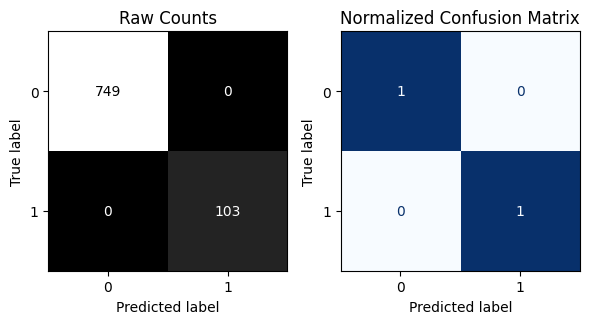


----------------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       251
           1       0.26      0.32      0.29        34

    accuracy                           0.81       285
   macro avg       0.58      0.60      0.59       285
weighted avg       0.83      0.81      0.82       285



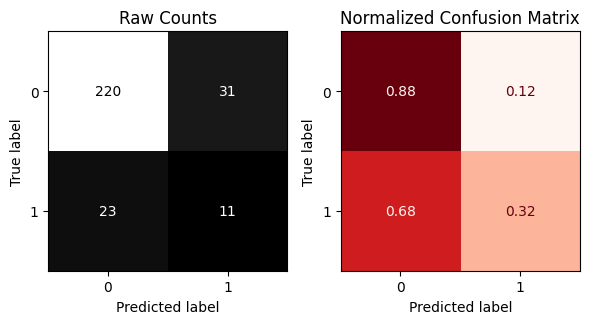

In [76]:
# Build pipeline with preprocessing + decision tree
dec_tree_pipe = make_pipeline(
    col_transformer,
    DecisionTreeClassifier(random_state=42)
)

# Fit the pipeline directly on the original (unprocessed) training data
dec_tree_pipe.fit(X_train, y_train)

# Predictions
y_pred_train = dec_tree_pipe.predict(X_train)
y_pred_test = dec_tree_pipe.predict(X_test)

# Evaluate using the custom classification evaluation function
evaluate_classification(dec_tree_pipe, X_train, y_train, X_test, y_test)

##Assessment of Evaluation

**1. Overall accuracy of the model**

* **Training Accuracy:** 100%

* **Test Accuracy:** 81%

* Considering the dataset is imbalanced (much more class 0 = no stroke than class 1 = stroke), the model’s accuracy looks high but is misleading. This is because the model is performing well on predicting the majority class (no stroke), but poorly on predicting the minority class (stroke).

So, while 81% might sound good, it hides the fact that stroke patients (class 1) are not being well-identified.

**2. False positives (unnecessary stroke alerts)**

Precision for class 1 (stroke) is 0.26.

* Precision = TP / (TP + FP).

* That means: 74% of stroke alerts are false alarms (unnecessary alerts for people who did not have a stroke).

So about 3 out of 4 alerts would be unnecessary.

**3. False negatives (missed stroke warnings)**

Recall for class 1 (stroke) is 0.32.

* Recall = TP / (TP + FN).

* That means the model only correctly identifies 32% of actual stroke cases, and misses 68% of patients who actually had a stroke.

So the model fails to warn about ~2/3 of strokes, which is very concerning.

**4. Which metric is most important to optimize? Why?**

* For stroke detection, recall for the positive class (stroke) is the most important.

* Reason: A false negative (missing a real stroke) can have life-threatening consequences, whereas a false positive (unnecessary alert) may only cause inconvenience or extra testing.

* In medical contexts, it’s usually better to maximize recall (catch as many true stroke cases as possible), even if it means increasing false positives.